<a href="https://colab.research.google.com/github/Mrsth/Pandas_practice/blob/master/Pokemon_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**




In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the csv file**

In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sales_Data/pokemon_data.csv')
df1.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [ ]:
df1.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


# **Checking for null values**

In [ ]:
df1.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

There are altogether 800 entries in the dataframe. And in "Type 2" series 386 values are null values. I.e. its almost half of the entries are null. So its better to remove it rather than recovering it. Hence the "Type 2" series is dropped.

In [ ]:
df1 = df1.drop(["Type 2"], axis=1)
df1.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


In [ ]:
df1["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
len(df1["Name"].unique())

800

**Group by**

In [ ]:
df1.groupby(["Type 1"])["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Generation"].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Type 1,,,,,,,
Bug,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391
Dark,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258
Dragon,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000
Electric,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727
Fairy,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647
Fighting,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370
Fire,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538
Flying,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000
Ghost,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500


# **Visualizing the data**

**Heat map**

It defines how all the features are correlated with each other in every possible ways.

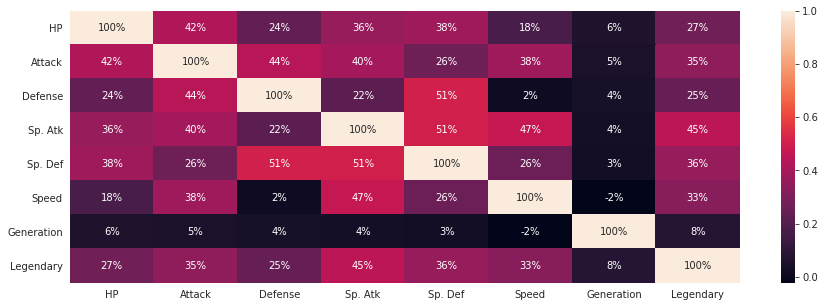

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df1.iloc[:,1:].corr(), annot=True, fmt='.0%')

**Countplot**

It depicts the total number of pokemon in each type.

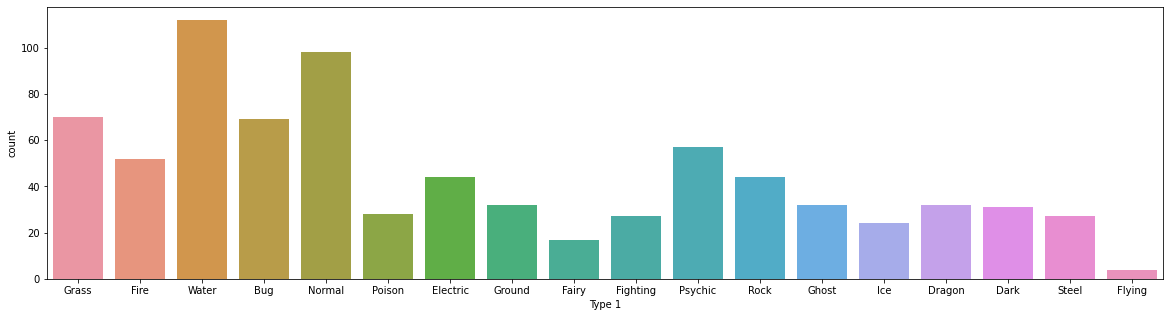

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(data=df1,x="Type 1")

**How many pokemons are there in each type of pokemon?**

In [ ]:
df1["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [ ]:
df1.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


**Pokemon having the highest HP in each category.**

In [ ]:
only_HP = df1.groupby(["Type 1"])

In [ ]:
only_HP_max = only_HP.max()
only_HP_max[["Name","HP"]]

,Name,HP
Type 1,,
Bug,Yanmega,86
Dark,Zweilous,126
Dragon,Zygarde50% Forme,125
Electric,Zebstrika,90
Fairy,Xerneas,126
Fighting,Tyrogue,144
Fire,Vulpix,115
Flying,TornadusTherian Forme,85
Ghost,Yamask,150


**Pokemon having the highest and the lowest HP**

In [ ]:
min_max_hp = only_HP.agg(["min","max"])
min_max_hp[["Name","HP"]]

Name                         HP     
                           min                    max min  max
Type 1                                                        
Bug                   Accelgor                Yanmega   1   86
Dark                     Absol               Zweilous  35  126
Dragon                 Altaria       Zygarde50% Forme  41  125
Electric              Ampharos              Zebstrika  20   90
Fairy               Aromatisse                Xerneas  35  126
Fighting            Conkeldurr                Tyrogue  30  144
Fire                  Arcanine                 Vulpix  38  115
Flying                  Noibat  TornadusTherian Forme  40   85
Ghost                  Banette                 Yamask  20  150
Grass                Abomasnow             Whimsicott  30  123
Ground                  Baltoy                Vibrava  10  115
Ice                   Articuno                Walrein  36  110
Normal                   Aipom              Zigzagoon  30  255
Poison                   Arbok                  Zubat  35  105
Psychic                   Abra                   Xatu  20  190
Rock                Aerodactyl                 Tyrunt  30  123
Steel     AegislashBlade Forme    SteelixMega Steelix  40  100
Water                Alomomola                 Wooper  20  170

**Pokemon having the highest Attack**

In [ ]:
only_attack = df1.groupby(["Type 1"])
only_max_attack = only_attack.max()

only_max_attack[["Name","Attack"]]

,Name,Attack
Type 1,,
Bug,Yanmega,185
Dark,Zweilous,150
Dragon,Zygarde50% Forme,180
Electric,Zebstrika,123
Fairy,Xerneas,131
Fighting,Tyrogue,145
Fire,Vulpix,160
Flying,TornadusTherian Forme,115
Ghost,Yamask,165


**Pokemon having the highest and the lowest Attack**

In [ ]:
min_max_hp = only_attack.agg(["min","max"])
min_max_hp[["Name","Attack"]]

Name                        Attack     
                           min                    max    min  max
Type 1                                                           
Bug                   Accelgor                Yanmega     10  185
Dark                     Absol               Zweilous     50  150
Dragon                 Altaria       Zygarde50% Forme     50  180
Electric              Ampharos              Zebstrika     30  123
Fairy               Aromatisse                Xerneas     20  131
Fighting            Conkeldurr                Tyrogue     35  145
Fire                  Arcanine                 Vulpix     30  160
Flying                  Noibat  TornadusTherian Forme     30  115
Ghost                  Banette                 Yamask     30  165
Grass                Abomasnow             Whimsicott     27  132
Ground                  Baltoy                Vibrava     40  180
Ice                   Articuno                Walrein     30  130
Normal                   Aipom              Zigzagoon      5  160
Poison                   Arbok                  Zubat     43  106
Psychic                   Abra                   Xatu     20  190
Rock                Aerodactyl                 Tyrunt     40  165
Steel     AegislashBlade Forme    SteelixMega Steelix     24  150
Water                Alomomola                 Wooper     10  155

**Min and max defense of each type**

In [ ]:
df1.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


In [ ]:
only_defense = df1.groupby(["Type 1"])
min_max_defense = only_defense.agg(["min","max"])
min_max_defense[["Name","Defense"]]

Name                        Defense     
                           min                    max     min  max
Type 1                                                            
Bug                   Accelgor                Yanmega      30  230
Dark                     Absol               Zweilous      30  125
Dragon                 Altaria       Zygarde50% Forme      35  130
Electric              Ampharos              Zebstrika      15  115
Fairy               Aromatisse                Xerneas      28   95
Fighting            Conkeldurr                Tyrogue      30   95
Fire                  Arcanine                 Vulpix      37  140
Flying                  Noibat  TornadusTherian Forme      35   80
Ghost                  Banette                 Yamask      30  145
Grass                Abomasnow             Whimsicott      30  131
Ground                  Baltoy                Vibrava      25  160
Ice                   Articuno                Walrein      15  184
Normal                   Aipom              Zigzagoon       5  126
Poison                   Arbok                  Zubat      35  120
Psychic                   Abra                   Xatu      15  160
Rock                Aerodactyl                 Tyrunt      40  200
Steel     AegislashBlade Forme    SteelixMega Steelix      50  230
Water                Alomomola                 Wooper      20  180

**Legendary pokemon by type**

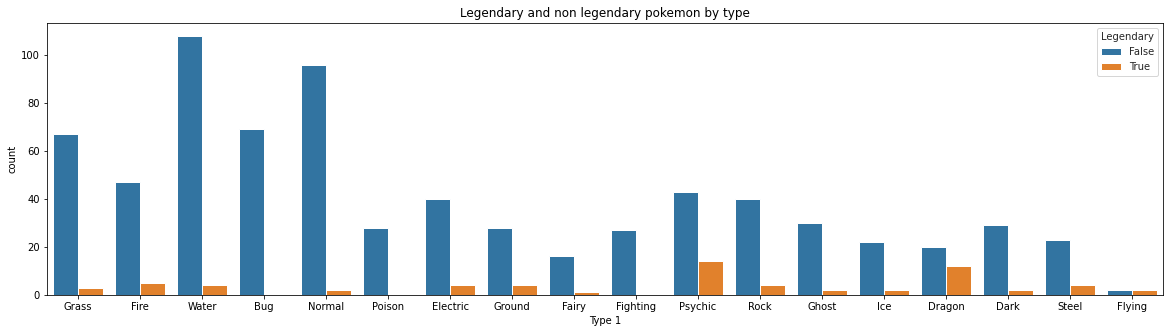

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Legendary and non legendary pokemon by type")
sns.set_style("whitegrid")
sns.countplot(data=df1, x = "Type 1", hue = "Legendary")

**How many legendary pokemon are there in each type**

In [ ]:
only_legendary = df1.loc[df1["Legendary"]==True]
only_legendary.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,106,190,100,154,100,130,1,True


In [ ]:
counting_legendary = only_legendary.groupby(["Type 1"])[["Legendary"]].agg(["count"])
counting_legendary

,Legendary
,count
Type 1,
Dark,2
Dragon,12
Electric,4
Fairy,1
Fire,5
Flying,2
Ghost,2
Grass,3


**Which is the strongest pokemon of all?**

In [ ]:
df1[["HP","Attack","Defense"]].idxmax()

HP         261
Attack     163
Defense    224
dtype: int64

In [ ]:
df1.head()

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,39,52,43,60,50,65,1,False


In [ ]:
strongest_pokemon = df1.iloc[df1[["HP","Attack","Defense"]].idxmax()]
strongest_pokemon.iloc[:,:6]

,#,Name,Type 1,HP,Attack,Defense
261,242,Blissey,Normal,255,10,10
163,150,MewtwoMega Mewtwo X,Psychic,106,190,100
224,208,SteelixMega Steelix,Steel,75,125,230


**Which is the fastest pokemon?**

In [ ]:
df1.loc[df1[["Speed"]].idxmax(),["Name","Type 1","Speed"]]

,Name,Type 1,Speed
431,DeoxysSpeed Forme,Psychic,180


**Which is the slowest pokemon?**

In [ ]:
df1.loc[df1[["Speed"]].idxmin(),["Name","Type 1","Speed"]]

,Name,Type 1,Speed
230,Shuckle,Bug,5


**How many pokemon generation are there and how many pokemons are there in each generation?**

In [ ]:
print("Number of pokemon generation = ", len(df1["Generation"].unique()))

Number of pokemon generation =  6


In [ ]:
for generation_type in df1["Generation"].unique():
  print("Generation = {}".format(generation_type))

Generation = 1
Generation = 2
Generation = 3
Generation = 4
Generation = 5
Generation = 6


In [ ]:
import numpy as np

generation = df1["Generation"].unique()
generation

array([1, 2, 3, 4, 5, 6])

In [ ]:
s = df1["Generation"].value_counts()
df2 = pd.DataFrame(s)
df2

,Generation
1,166
5,165
3,160
4,121
2,106
6,82


In [ ]:
df2.reset_index(inplace=True)

In [ ]:
df2.columns

Index(['index', 'Generation'], dtype='object')

In [ ]:
df2.rename(columns={"index":"Pokemon Generation", "Generation":"Total Pokemon"})

,Pokemon Generation,Total Pokemon
0,1,166
1,5,165
2,3,160
3,4,121
4,2,106
5,6,82
